In [10]:
import pandas as pd

In [11]:
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.groupby("Category").describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [13]:
df['spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [14]:
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['spam'], test_size=0.25)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train)
X_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count, y_train)

MultinomialNB()

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np
# Create a CountVectorizer object
v = CountVectorizer()

# Fit the vectorizer to the entire dataset (including training data)
v.fit(df['Message'])

# Transform both the training and test data
X_train_count = v.transform(X_train)
X_test_count = v.transform(X_test)

# Train the model on the transformed training data
model = MultinomialNB()
model.fit(X_train_count, y_train)

# Evaluate the model on the transformed test data
model.score(X_test_count, y_test)

0.9834888729361091

In [34]:
predicted = np.array(model.predict(X_test_count))

In [38]:
len(predicted[predicted == 0])

1211

In [40]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [42]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [43]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
clf.score(X_test, y_test)

0.9856424982053122

## Exercise

In [45]:
from sklearn.datasets import load_wine
wine = load_wine()

In [70]:
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['wine_class'] = wine.target
wine_df['wine_name'] = wine_df['wine_class'].apply(lambda x: wine.target_names[x])

In [71]:
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class,wine_name
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,class_2


In [59]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [60]:
X = wine_df.drop('wine_name', axis=1)
y = wine_df['wine_name']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [68]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
gaussian = GaussianNB()
multinomial = MultinomialNB()

In [69]:
gaussian.fit(X_train, y_train)
multinomial.fit(X_train, y_train)
gaussian.score(X_test, y_test), multinomial.score(X_test, y_test)

(1.0, 0.8666666666666667)

Text(0.5, 1.0, 'Wine class ')

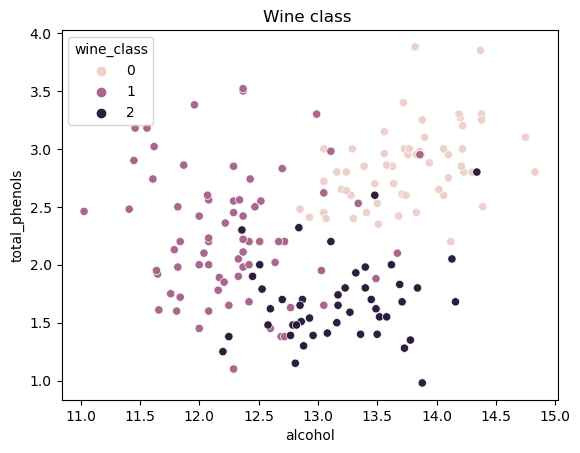

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=wine_df['alcohol'], y=wine_df['total_phenols'], hue=wine_df['wine_class'])
plt.title("Wine class ")